# Homework 1
- Tommaso Bertola 2086990
- Giacomo Di Prima 2086992
- Giuseppe Viterbo 2086516
- Marzo Zenari 2097012

In [2]:
#DNN library
import tensorflow as tf
import keras, sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout

#common libraries
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rc('image', cmap='copper') #global colormap 

#random seed
seed=1
np.random.seed(seed) # fix random seed

2023-03-06 22:33:32.547614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 22:33:34.765102: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/vepe/miniconda3/envs/tf_gpu/lib/
2023-03-06 22:33:34.765265: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/loca

In [3]:
%run nonlinear_function.py #here is loaded the filename, to be run only once

In [4]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample{L}')

#training percentage
perc_train = 0.8


N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample2
data: 4000
train: 3200


In [5]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [6]:
### Rescale input data

def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [6]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.2)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))
        
    return model 

### Optimization method and cost function

In [7]:
def compile_model(optimizer='adam', act_func='relu', neurons=20):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

## EX.1 Modify the Hyperparameters to Optimize Performance of the Model

In [60]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [64]:
# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Adamax']
act_func = ['sigmoid','tanh', 'ReLU', 'ELU']
batch_size = [10, 20, 30]
neurons =[10, 20, 30]
nepochs = 8

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(model=compile_model, 
                        epochs=nepochs, 
                        batch_size=batch_size,
                        act_func=act_func,
                        model__neurons=neurons,
                        verbose=1)

# define parameter dictionary
param_grid = dict(optimizer=optimizer,
                  act_func=act_func,
                  batch_size=batch_size,
                  model__neurons=neurons)

print(param_grid)


# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)

{'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Adamax'], 'act_func': ['sigmoid', 'tanh', 'ReLU', 'ELU'], 'batch_size': [10, 20, 30], 'model__neurons': [10, 20, 30]}


In [67]:
grid

GridSearchCV(cv=4,
             estimator=KerasClassifier(act_func=['sigmoid', 'tanh', 'ReLU', 'ELU'], batch_size=[10, 20, 30], epochs=8, model=<function compile_model at 0x7f25453b6820>, model__neurons=[10, 20, 30]),
             n_jobs=-1,
             param_grid={'act_func': ['sigmoid', 'tanh', 'ReLU', 'ELU'],
                         'batch_size': [10, 20, 30],
                         'model__neurons': [10, 20, 30],
                         'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adam',
                                       'Adamax']})

In [68]:
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2023-03-06 23:06:59.794649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 23:06:59.866857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 23:06:59.925874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2023-03-06 23:07:03.530121: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/vepe/miniconda3/envs/tf_gpu/lib/
2023-03-06 23:07:03.530609: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/vepe/miniconda3/envs/tf_gpu/lib/
2023-03-06 23:07:03.530680: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries m

2023-03-06 23:07:05.684721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-06 23:07:05.737655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-06 23:07:05.738193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-06 23:07:05.738741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

2023-03-06 23:07:22.304781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-06 23:07:22.305428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-06 23:07:22.305459: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1700] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2023-03-06 23:07:22.305941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-06 23:07:22.306056: I tensorflow/core/common_runtime/gpu/gpu_device.c

Epoch 1/8
Epoch 1/8


KeyboardInterrupt: 

In [14]:
print(f'The best parameters are:{grid_result.best_params_},\nwhith a score of {grid_result.best_score_}')

The best parameters are:{'act_func': 'ReLU', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'Adamax'},
whith a score of 0.848125


In [15]:
nepochs=400

model = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [17]:
history = model.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = grid_result.best_params_['batch_size'],
                    validation_data=(x_valid,y_valid),
                    verbose=2)

Epoch 1/400
320/320 - 1s - loss: 0.6411 - accuracy: 0.6456 - val_loss: 0.5898 - val_accuracy: 0.6800 - 745ms/epoch - 2ms/step
Epoch 2/400
320/320 - 0s - loss: 0.5753 - accuracy: 0.6862 - val_loss: 0.5538 - val_accuracy: 0.6950 - 466ms/epoch - 1ms/step
Epoch 3/400
320/320 - 0s - loss: 0.5526 - accuracy: 0.7025 - val_loss: 0.5376 - val_accuracy: 0.7075 - 303ms/epoch - 946us/step
Epoch 4/400
320/320 - 0s - loss: 0.5360 - accuracy: 0.7216 - val_loss: 0.5198 - val_accuracy: 0.7387 - 306ms/epoch - 957us/step
Epoch 5/400
320/320 - 0s - loss: 0.5185 - accuracy: 0.7316 - val_loss: 0.5060 - val_accuracy: 0.7462 - 293ms/epoch - 916us/step
Epoch 6/400
320/320 - 0s - loss: 0.5049 - accuracy: 0.7425 - val_loss: 0.4967 - val_accuracy: 0.7487 - 348ms/epoch - 1ms/step
Epoch 7/400
320/320 - 0s - loss: 0.4971 - accuracy: 0.7456 - val_loss: 0.4891 - val_accuracy: 0.7538 - 295ms/epoch - 922us/step
Epoch 8/400
320/320 - 0s - loss: 0.4886 - accuracy: 0.7491 - val_loss: 0.4834 - val_accuracy: 0.7563 - 315ms/e

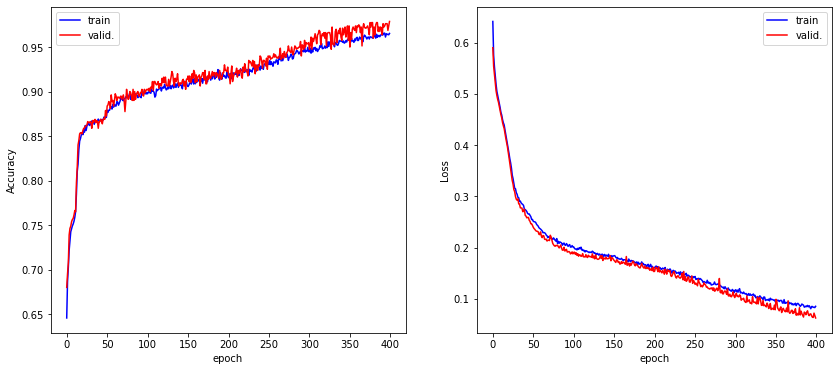

In [18]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train",c="b")
ax.plot(history.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history.history['loss'],label="train",c="b")
ax.plot(history.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Ex.2 Change the number of sample 

### Reduced number of sample

In [19]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

red_val=0.6
(x, y) = (x[:int(red_val*len(x))], y[:int(red_val*len(x))])

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1920 	 Validation: 480


In [20]:
#optimization
nepochs=400
model_reduced = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [21]:
history_reduced = model_reduced.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
192/192 [==============================] - 1s 2ms/step - loss: 0.7883 - accuracy: 0.5437 - val_loss: 0.6662 - val_accuracy: 0.5708
Epoch 2/400
192/192 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.5448 - val_loss: 0.6578 - val_accuracy: 0.5875
Epoch 3/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5667 - val_loss: 0.6561 - val_accuracy: 0.5708
Epoch 4/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6026 - val_loss: 0.6628 - val_accuracy: 0.5833
Epoch 5/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6047 - val_loss: 0.6475 - val_accuracy: 0.6000
Epoch 6/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6307 - val_loss: 0.6456 - val_accuracy: 0.6167
Epoch 7/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6255 - val_loss: 0.6372 - val_accuracy: 0.6167

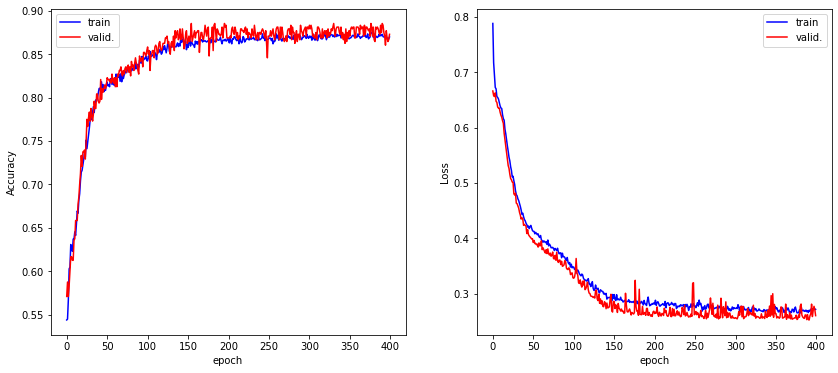

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_reduced.history['accuracy'],label="train",c="b")
ax.plot(history_reduced.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_reduced.history['loss'],label="train",c="b")
ax.plot(history_reduced.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

### Increased number of sample
We generated two additional file where the numeber of sample is 6000 using the same generate_data_DNN_2023 notebook. 

In [29]:
x = np.loadtxt(filename("data_increased",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels_increased",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 4800 	 Validation: 1200


In [30]:
#optimization
nepochs=400
model_increased = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [31]:
history_increased = model_increased.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
480/480 [==============================] - 1s 1ms/step - loss: 0.7161 - accuracy: 0.6025 - val_loss: 0.6299 - val_accuracy: 0.6292
Epoch 2/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6402 - accuracy: 0.6333 - val_loss: 0.6163 - val_accuracy: 0.6400
Epoch 3/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6446 - val_loss: 0.6062 - val_accuracy: 0.6542
Epoch 4/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6123 - accuracy: 0.6569 - val_loss: 0.5989 - val_accuracy: 0.6692
Epoch 5/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.6665 - val_loss: 0.5899 - val_accuracy: 0.6792
Epoch 6/400
480/480 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.6746 - val_loss: 0.5893 - val_accuracy: 0.6825
Epoch 7/400
480/480 [==============================] - 1s 1ms/step - loss: 0.5933 - accuracy: 0.6758 - val_loss: 0.5836 - val_accuracy: 0.6817

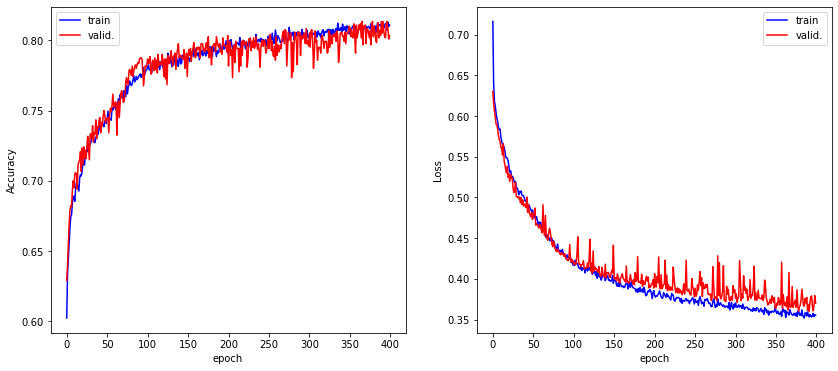

In [32]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_increased.history['accuracy'],label="train",c="b")
ax.plot(history_increased.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_increased.history['loss'],label="train",c="b")
ax.plot(history_increased.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

### Augmented number of sample

We decided to not augment the validation set since we want to obtain an accurate estimation of the error and adding artificial data would compromise the logic behind this validation procedure.    

In [72]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_aug = x_train + np.random.normal(0, 0.05, size=x_train.shape)
y_aug = np.copy(y_train)

x_train = np.vstack((x_train, x_aug))
y_train = np.hstack((y_train, y_aug))
print('After augmentation')
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800
After augmentation
Train: 6400 	 Validation: 800


In [75]:
#optimization
nepochs=400
model_augmented = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [76]:
history_augmented = model_augmented.fit(x_train, y_train,
                                      epochs = nepochs,
                                      batch_size = grid_result.best_params_['batch_size'],
                                      validation_data=(x_valid,y_valid),
                                      verbose=1)

Epoch 1/400
640/640 [==============================] - 12s 10ms/step - loss: 0.6909 - accuracy: 0.5297 - val_loss: 0.6882 - val_accuracy: 0.5537
Epoch 2/400
640/640 [==============================] - 7s 10ms/step - loss: 0.6855 - accuracy: 0.5373 - val_loss: 0.6838 - val_accuracy: 0.5550
Epoch 3/400
640/640 [==============================] - 6s 10ms/step - loss: 0.6825 - accuracy: 0.5367 - val_loss: 0.6813 - val_accuracy: 0.5612
Epoch 4/400
640/640 [==============================] - 7s 11ms/step - loss: 0.6810 - accuracy: 0.5416 - val_loss: 0.6788 - val_accuracy: 0.5550
Epoch 5/400
640/640 [==============================] - 7s 11ms/step - loss: 0.6795 - accuracy: 0.5380 - val_loss: 0.6827 - val_accuracy: 0.5500
Epoch 6/400
640/640 [==============================] - 7s 11ms/step - loss: 0.6771 - accuracy: 0.5517 - val_loss: 0.6790 - val_accuracy: 0.5600
Epoch 7/400
640/640 [==============================] - 6s 10ms/step - loss: 0.6754 - accuracy: 0.5487 - val_loss: 0.6768 - val_accuracy

KeyboardInterrupt: 

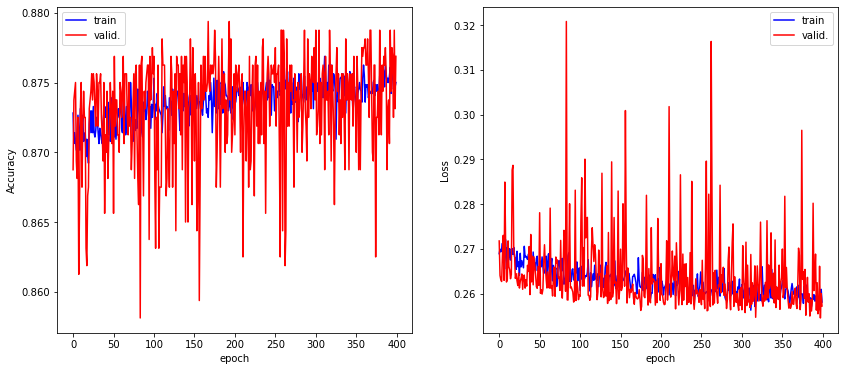

In [26]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_augmented.history['accuracy'],label="train",c="b")
ax.plot(history_augmented.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_augmented.history['loss'],label="train",c="b")
ax.plot(history_augmented.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Ex.3 Non linearly seperable data

In [10]:
TYPE = 2

x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample{L}')

#training percentage
perc_train = 0.8

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample2
data: 4000
train: 3200


In [11]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [12]:
def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

<function matplotlib.pyplot.show(close=None, block=None)>

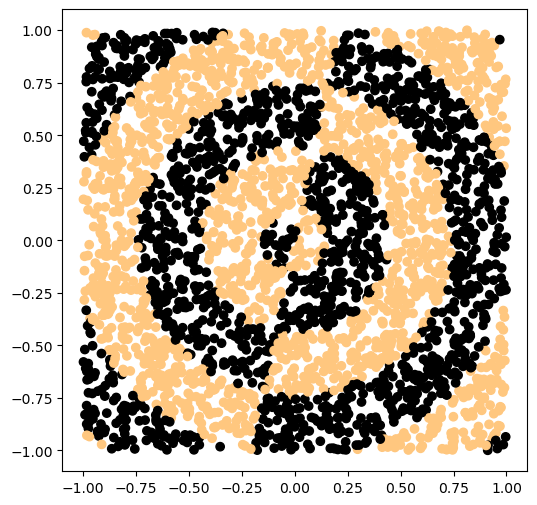

In [15]:
plt.figure(figsize = (6,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show

In [52]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.2)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))

    return model 

In [53]:
def compile_model(optimizer='adam', act_func='relu', neurons=20):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

In [54]:
model = compile_model()

In [55]:
nepoch=400
history = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 3s - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6939 - val_accuracy: 0.5200 - 3s/epoch - 53ms/step
Epoch 2/400
64/64 - 1s - loss: 0.6923 - accuracy: 0.5256 - val_loss: 0.6937 - val_accuracy: 0.5600 - 526ms/epoch - 8ms/step
Epoch 3/400
64/64 - 1s - loss: 0.6908 - accuracy: 0.5603 - val_loss: 0.6920 - val_accuracy: 0.5650 - 559ms/epoch - 9ms/step
Epoch 4/400
64/64 - 1s - loss: 0.6879 - accuracy: 0.5828 - val_loss: 0.6877 - val_accuracy: 0.5900 - 524ms/epoch - 8ms/step
Epoch 5/400
64/64 - 1s - loss: 0.6808 - accuracy: 0.6003 - val_loss: 0.6804 - val_accuracy: 0.5675 - 622ms/epoch - 10ms/step
Epoch 6/400
64/64 - 0s - loss: 0.6719 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.6037 - 471ms/epoch - 7ms/step
Epoch 7/400
64/64 - 1s - loss: 0.6558 - accuracy: 0.6172 - val_loss: 0.6539 - val_accuracy: 0.6087 - 603ms/epoch - 9ms/step
Epoch 8/400
64/64 - 1s - loss: 0.6490 - accuracy: 0.6184 - val_loss: 0.6487 - val_accuracy: 0.5938 - 569ms/epoch - 9ms/step
Epoch 9/4

Epoch 67/400
64/64 - 0s - loss: 0.5075 - accuracy: 0.6859 - val_loss: 0.5165 - val_accuracy: 0.7013 - 435ms/epoch - 7ms/step
Epoch 68/400
64/64 - 0s - loss: 0.5059 - accuracy: 0.6784 - val_loss: 0.5215 - val_accuracy: 0.6975 - 473ms/epoch - 7ms/step
Epoch 69/400
64/64 - 0s - loss: 0.5108 - accuracy: 0.6794 - val_loss: 0.5113 - val_accuracy: 0.7100 - 455ms/epoch - 7ms/step
Epoch 70/400
64/64 - 1s - loss: 0.5098 - accuracy: 0.6903 - val_loss: 0.5075 - val_accuracy: 0.6925 - 591ms/epoch - 9ms/step
Epoch 71/400
64/64 - 1s - loss: 0.5057 - accuracy: 0.6888 - val_loss: 0.5155 - val_accuracy: 0.6762 - 681ms/epoch - 11ms/step
Epoch 72/400
64/64 - 0s - loss: 0.5085 - accuracy: 0.6844 - val_loss: 0.5618 - val_accuracy: 0.6700 - 444ms/epoch - 7ms/step
Epoch 73/400
64/64 - 0s - loss: 0.5195 - accuracy: 0.6784 - val_loss: 0.5438 - val_accuracy: 0.6800 - 466ms/epoch - 7ms/step
Epoch 74/400
64/64 - 1s - loss: 0.4986 - accuracy: 0.6884 - val_loss: 0.5120 - val_accuracy: 0.6888 - 685ms/epoch - 11ms/ste

64/64 - 1s - loss: 0.4903 - accuracy: 0.7084 - val_loss: 0.4861 - val_accuracy: 0.7325 - 634ms/epoch - 10ms/step
Epoch 133/400
64/64 - 1s - loss: 0.4863 - accuracy: 0.7109 - val_loss: 0.4873 - val_accuracy: 0.7312 - 686ms/epoch - 11ms/step
Epoch 134/400
64/64 - 1s - loss: 0.4891 - accuracy: 0.6975 - val_loss: 0.4831 - val_accuracy: 0.7175 - 636ms/epoch - 10ms/step
Epoch 135/400
64/64 - 1s - loss: 0.4866 - accuracy: 0.7056 - val_loss: 0.4942 - val_accuracy: 0.7025 - 645ms/epoch - 10ms/step
Epoch 136/400
64/64 - 1s - loss: 0.4931 - accuracy: 0.7025 - val_loss: 0.4823 - val_accuracy: 0.7325 - 530ms/epoch - 8ms/step
Epoch 137/400
64/64 - 1s - loss: 0.4835 - accuracy: 0.7106 - val_loss: 0.4846 - val_accuracy: 0.7325 - 648ms/epoch - 10ms/step
Epoch 138/400
64/64 - 1s - loss: 0.4843 - accuracy: 0.7059 - val_loss: 0.4792 - val_accuracy: 0.7337 - 523ms/epoch - 8ms/step
Epoch 139/400
64/64 - 1s - loss: 0.4877 - accuracy: 0.7025 - val_loss: 0.4781 - val_accuracy: 0.7275 - 624ms/epoch - 10ms/step


64/64 - 0s - loss: 0.4693 - accuracy: 0.7044 - val_loss: 0.4487 - val_accuracy: 0.7412 - 449ms/epoch - 7ms/step
Epoch 198/400
64/64 - 1s - loss: 0.4738 - accuracy: 0.7116 - val_loss: 0.4725 - val_accuracy: 0.7362 - 514ms/epoch - 8ms/step
Epoch 199/400
64/64 - 1s - loss: 0.4678 - accuracy: 0.7022 - val_loss: 0.4455 - val_accuracy: 0.7450 - 568ms/epoch - 9ms/step
Epoch 200/400
64/64 - 1s - loss: 0.4694 - accuracy: 0.7053 - val_loss: 0.4655 - val_accuracy: 0.7475 - 531ms/epoch - 8ms/step
Epoch 201/400
64/64 - 0s - loss: 0.4662 - accuracy: 0.7103 - val_loss: 0.4439 - val_accuracy: 0.7425 - 436ms/epoch - 7ms/step
Epoch 202/400
64/64 - 1s - loss: 0.4643 - accuracy: 0.7088 - val_loss: 0.4479 - val_accuracy: 0.7475 - 517ms/epoch - 8ms/step
Epoch 203/400
64/64 - 0s - loss: 0.4674 - accuracy: 0.7103 - val_loss: 0.4546 - val_accuracy: 0.7437 - 456ms/epoch - 7ms/step
Epoch 204/400
64/64 - 0s - loss: 0.4730 - accuracy: 0.7041 - val_loss: 0.4582 - val_accuracy: 0.7325 - 483ms/epoch - 8ms/step
Epoch 

64/64 - 1s - loss: 0.4513 - accuracy: 0.7234 - val_loss: 0.4220 - val_accuracy: 0.7475 - 559ms/epoch - 9ms/step
Epoch 263/400
64/64 - 1s - loss: 0.4540 - accuracy: 0.7175 - val_loss: 0.4353 - val_accuracy: 0.7437 - 539ms/epoch - 8ms/step
Epoch 264/400
64/64 - 1s - loss: 0.4539 - accuracy: 0.7244 - val_loss: 0.4353 - val_accuracy: 0.7513 - 636ms/epoch - 10ms/step
Epoch 265/400
64/64 - 0s - loss: 0.4648 - accuracy: 0.7237 - val_loss: 0.4311 - val_accuracy: 0.7475 - 446ms/epoch - 7ms/step
Epoch 266/400
64/64 - 1s - loss: 0.4570 - accuracy: 0.7172 - val_loss: 0.4479 - val_accuracy: 0.7500 - 570ms/epoch - 9ms/step
Epoch 267/400
64/64 - 1s - loss: 0.4523 - accuracy: 0.7228 - val_loss: 0.4317 - val_accuracy: 0.7625 - 594ms/epoch - 9ms/step
Epoch 268/400
64/64 - 1s - loss: 0.4543 - accuracy: 0.7219 - val_loss: 0.4323 - val_accuracy: 0.7500 - 525ms/epoch - 8ms/step
Epoch 269/400
64/64 - 0s - loss: 0.4490 - accuracy: 0.7206 - val_loss: 0.4280 - val_accuracy: 0.7538 - 459ms/epoch - 7ms/step
Epoch

Epoch 327/400
64/64 - 1s - loss: 0.4305 - accuracy: 0.7434 - val_loss: 0.3977 - val_accuracy: 0.7713 - 580ms/epoch - 9ms/step
Epoch 328/400
64/64 - 1s - loss: 0.4289 - accuracy: 0.7397 - val_loss: 0.4014 - val_accuracy: 0.7700 - 560ms/epoch - 9ms/step
Epoch 329/400
64/64 - 0s - loss: 0.4362 - accuracy: 0.7362 - val_loss: 0.4506 - val_accuracy: 0.7550 - 478ms/epoch - 7ms/step
Epoch 330/400
64/64 - 0s - loss: 0.4349 - accuracy: 0.7353 - val_loss: 0.4186 - val_accuracy: 0.7575 - 472ms/epoch - 7ms/step
Epoch 331/400
64/64 - 0s - loss: 0.4299 - accuracy: 0.7400 - val_loss: 0.4070 - val_accuracy: 0.7663 - 459ms/epoch - 7ms/step
Epoch 332/400
64/64 - 0s - loss: 0.4270 - accuracy: 0.7444 - val_loss: 0.4083 - val_accuracy: 0.7675 - 454ms/epoch - 7ms/step
Epoch 333/400
64/64 - 1s - loss: 0.4448 - accuracy: 0.7306 - val_loss: 0.4429 - val_accuracy: 0.7450 - 681ms/epoch - 11ms/step
Epoch 334/400
64/64 - 1s - loss: 0.4405 - accuracy: 0.7319 - val_loss: 0.4160 - val_accuracy: 0.7688 - 648ms/epoch - 

Epoch 392/400
64/64 - 0s - loss: 0.3985 - accuracy: 0.7634 - val_loss: 0.3780 - val_accuracy: 0.7588 - 423ms/epoch - 7ms/step
Epoch 393/400
64/64 - 0s - loss: 0.3998 - accuracy: 0.7588 - val_loss: 0.3863 - val_accuracy: 0.7775 - 447ms/epoch - 7ms/step
Epoch 394/400
64/64 - 1s - loss: 0.4053 - accuracy: 0.7688 - val_loss: 0.4083 - val_accuracy: 0.7675 - 516ms/epoch - 8ms/step
Epoch 395/400
64/64 - 0s - loss: 0.4094 - accuracy: 0.7613 - val_loss: 0.3769 - val_accuracy: 0.7800 - 457ms/epoch - 7ms/step
Epoch 396/400
64/64 - 1s - loss: 0.3984 - accuracy: 0.7625 - val_loss: 0.3893 - val_accuracy: 0.7638 - 517ms/epoch - 8ms/step
Epoch 397/400
64/64 - 1s - loss: 0.4004 - accuracy: 0.7691 - val_loss: 0.3866 - val_accuracy: 0.7812 - 536ms/epoch - 8ms/step
Epoch 398/400
64/64 - 1s - loss: 0.4041 - accuracy: 0.7588 - val_loss: 0.3678 - val_accuracy: 0.7887 - 590ms/epoch - 9ms/step
Epoch 399/400
64/64 - 1s - loss: 0.3978 - accuracy: 0.7584 - val_loss: 0.3804 - val_accuracy: 0.7763 - 596ms/epoch - 9

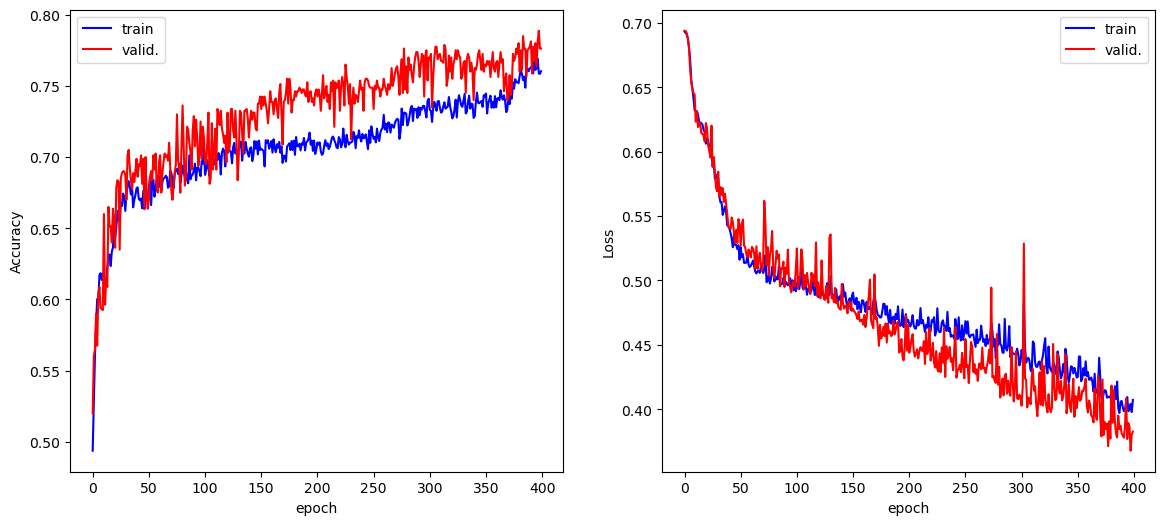

In [56]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train",c="b")
ax.plot(history.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history.history['loss'],label="train",c="b")
ax.plot(history.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [57]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

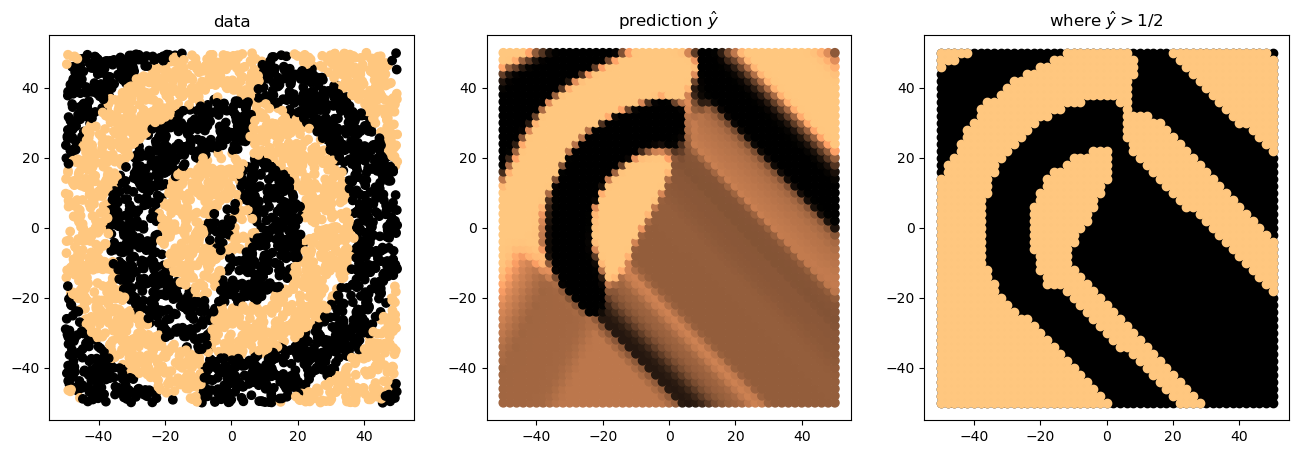

In [58]:
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show